# Artificial Neural Network 2

#### This ANN contains two hidden layers with 50 neurons each and uses the ReLU activation function. The outputs will provide analysis of the accuracy and loss of the network, as well as a frequency tracker for missclassified digits.

Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7115 - loss: 0.9942 - val_accuracy: 0.9290 - val_loss: 0.2478
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9313 - loss: 0.2398 - val_accuracy: 0.9433 - val_loss: 0.1920
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9467 - loss: 0.1807 - val_accuracy: 0.9548 - val_loss: 0.1622
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9567 - loss: 0.1519 - val_accuracy: 0.9572 - val_loss: 0.1486
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9621 - loss: 0.1276 - val_accuracy: 0.9613 - val_loss: 0.1390
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9665 - loss: 0.1123 - val_accuracy: 0.9625 - val_loss: 0.1282
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9726 - loss: 0.0918 - val_accuracy: 0.9643 - val_loss: 0.1226
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9749 - loss: 0.0864 - val_accuracy: 0.

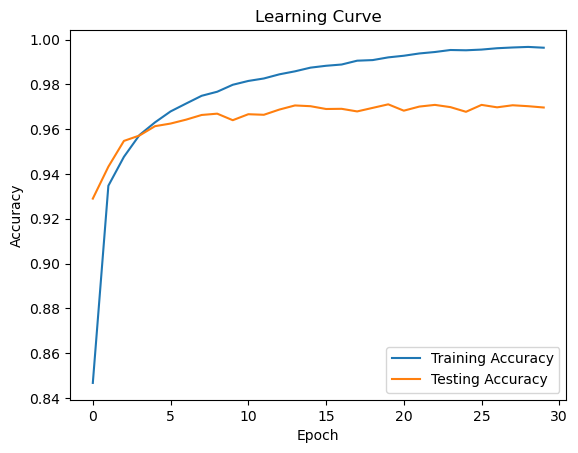

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9966 - loss: 0.0132
Training Loss: 0.03482229262590408
Training Accuracy: 0.9917833209037781


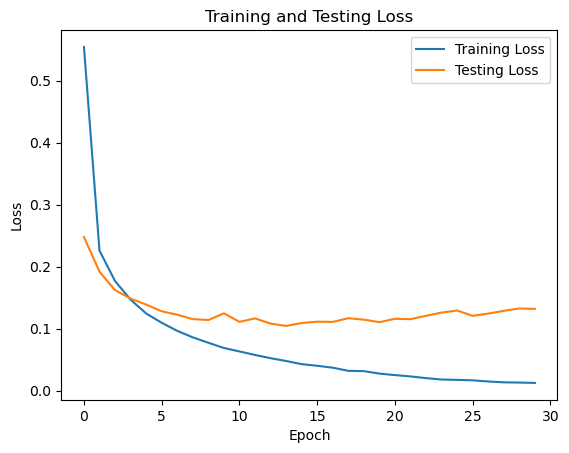

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


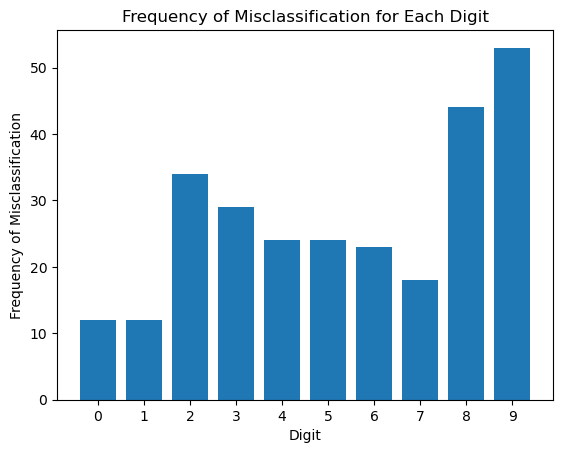

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Reshape the data to be in the format (num_samples, 28*28) 
# pictures of numbers are 28x28 pixels
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

# One-hot encode the target variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential()
num_hidden = 50
model.add(Dense(num_hidden, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(num_hidden, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Number of sets for training
num_sets = 100

# Training the model
history = model.fit(X_train[:num_sets*1000], y_train[:num_sets*1000], epochs=30, batch_size=200, validation_split=0.2)
# epochs: number of times the entire dataset will be passed forward and backward through the neural network during training
# batch size: the number of samples that will be propagated through the network before the model's parameters are updated
# validation split: splits a fraction of the training data (20%) into a separate validation set

# Plot the learning curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.savefig('better_learning_relu.png')
plt.show()

# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(X_train[:num_sets*1000], y_train[:num_sets*1000])
print('Training Loss:', train_loss)
print('Training Accuracy:', train_acc)

# Plot training and validation loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.savefig('better_loss_relu.png')
plt.show()


# Predict labels for the validation set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Find incorrectly classified digits
incorrect_indices = np.where(y_pred_labels != y_true_labels)[0]
incorrect_digits = y_true_labels[incorrect_indices]

# Count the frequency of incorrectly classified digits
incorrect_digit_counts = np.bincount(incorrect_digits)

# Plot the histogram of incorrectly classified digits
plt.figure()
plt.bar(range(10), incorrect_digit_counts)
plt.xlabel('Digit')
plt.ylabel('Frequency of Misclassification')
plt.title('Frequency of Misclassification for Each Digit')
plt.xticks(range(10))
plt.savefig('better_hist_relu.png')
plt.show()
